# Analyzing Commits Categories

In [12]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import itertools
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from matplotlib.ticker import PercentFormatter
import ast

In [21]:
df = pd.read_excel('C:\\paper\\empirical_analysis\\data\\RQ2\\coevolution_taxonomy.xlsx', sheet_name='rater_1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gitauthor           357 non-null    object
 1   projectname         357 non-null    object
 2   commitid            357 non-null    object
 3   commitmessage       357 non-null    object
 4   lsof_modifiedfiles  357 non-null    object
 5   PRTitle             357 non-null    object
 6   PRDescription       318 non-null    object
 7   Categories          357 non-null    object
dtypes: object(8)
memory usage: 22.4+ KB


In [23]:
def parse_categories(category_string):
    try:
        categories_list = ast.literal_eval(category_string.lower())
        categories_list = list(set(categories_list))
        sorted_categories = sorted(categories_list)
        return sorted_categories
    except (SyntaxError, ValueError):
        print(category_string)
        return []

In [24]:
categories_lists  = df['Categories'].apply(parse_categories).explode()

category_counts = Counter(categories_lists)
category_frequency_dict = dict(category_counts)
category_frequency_dict = {k: v for k, v in sorted(category_frequency_dict.items(), key=lambda item: item[1])}

for i in category_frequency_dict:
    print(f"{i}: {category_frequency_dict[i]}")

model and data versioning: 4
security: 9
performance optimization: 11
model training: 13
deployment: 34
refactoring: 35
integration: 54
code cleanup: 61
bug fixing: 81
dependency management: 124
documentation: 132
feature development: 188
testing: 290
pipeline automation: 354


In [25]:
category_percentage_dict = {k: (v / len(categories_lists)) * 100 for k, v in category_counts.items()}
category_percentage_dict = {k: v for k, v in sorted(category_percentage_dict.items(), key=lambda item: item[1], reverse=True)}

for i in category_percentage_dict:
    print(f"{i}: {category_percentage_dict[i]:.2f}%")

pipeline automation: 25.47%
testing: 20.86%
feature development: 13.53%
documentation: 9.50%
dependency management: 8.92%
bug fixing: 5.83%
code cleanup: 4.39%
integration: 3.88%
refactoring: 2.52%
deployment: 2.45%
model training: 0.94%
performance optimization: 0.79%
security: 0.65%
model and data versioning: 0.29%


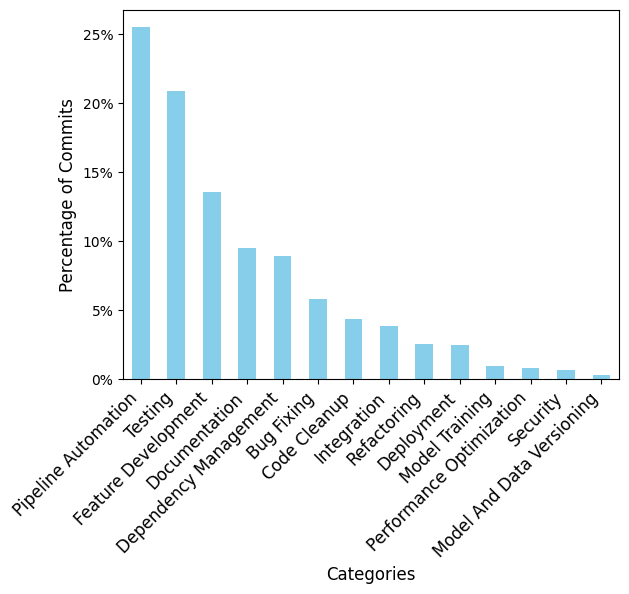

In [26]:
category_df = pd.DataFrame.from_dict(category_percentage_dict, orient='index', columns=['Percentage'])
category_df.index = category_df.index.str.title()

ax = category_df.plot(kind='bar', legend=False, color='skyblue')
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.ylabel('Percentage of Commits', fontsize=12)
plt.xlabel('Categories', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
ax.set_facecolor('white')


plt.savefig('rq2_distribution.eps', format='eps', bbox_inches='tight')

plt.show()

In [27]:
category_df = pd.DataFrame.from_dict(category_counts, orient='index', columns=['Count'])
category_df.reset_index(inplace=True)
category_df.columns = ['Categories', 'Count']

df['Categories'] = df['Categories'].apply(eval)

category_pairs = []
for categories in df['Categories']:
    pairs = list(itertools.combinations(categories, 2))
    category_pairs.extend(pairs)

# Create a DataFrame with category pairs
pairs_df = pd.DataFrame(category_pairs, columns=['Category1', 'Category2'])

# Count the occurrences of each category pair
category_pair_counts = pairs_df.groupby(['Category1', 'Category2']).size().reset_index(name='Count')

In [28]:
pivot_table = category_pair_counts.pivot_table(index='Category1', columns='Category2', values='Count', fill_value=0)
pivot_table.corr().style.background_gradient(cmap='coolwarm')


Category2,Bug Fixing,Code Cleanup,Dependency Management,Deployment,Documentation,Feature Development,Integration,Model And Data Versioning,Model Training,Performance Optimization,Pipeline Automation,Refactoring,Security,Testing
Category2,,,,,,,,,,,,,,
Bug Fixing,1.000000,0.685689,0.722209,0.846503,0.847159,0.482854,0.850615,0.627485,0.884686,0.733275,0.680090,0.866111,0.674702,0.795291
Code Cleanup,0.685689,1.000000,0.955775,0.927142,0.885149,0.896560,0.933705,0.904299,0.746525,0.923120,0.380243,0.761981,0.876553,0.695232
Dependency Management,0.722209,0.955775,1.000000,0.949505,0.946277,0.858714,0.966760,0.947908,0.820936,0.936971,0.467718,0.850340,0.880111,0.737349
Deployment,0.846503,0.927142,0.949505,1.000000,0.948071,0.843832,0.978823,0.902099,0.885753,0.936927,0.433959,0.860159,0.902889,0.858653
Documentation,0.847159,0.885149,0.946277,0.948071,1.000000,0.793669,0.946040,0.933090,0.828887,0.950431,0.575482,0.920232,0.908589,0.762895
Feature Development,0.482854,0.896560,0.858714,0.843832,0.793669,1.000000,0.784553,0.905698,0.532556,0.880572,0.034294,0.569095,0.912375,0.595723
Integration,0.850615,0.933705,0.966760,0.978823,0.946040,0.784553,1.000000,0.878998,0.915229,0.911210,0.527962,0.878431,0.835923,0.825782
Model And Data Versioning,0.627485,0.904299,0.947908,0.902099,0.933090,0.905698,0.878998,1.000000,0.693465,0.962100,0.376388,0.814582,0.945929,0.706079
Model Training,0.884686,0.746525,0.820936,0.885753,0.828887,0.532556,0.915229,0.693465,1.000000,0.780581,0.578690,0.841387,0.629594,0.904865


In [34]:
te = TransactionEncoder()
te_ary = te.fit(df['Categories']).transform(df['Categories'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bug Fixing),(Pipeline Automation),0.226891,0.991597,0.226891,1.000000,1.008475,0.001907,inf,0.010870
1,(Bug Fixing),(Testing),0.226891,0.812325,0.179272,0.790123,0.972669,-0.005037,0.894217,-0.035070
2,(Code Cleanup),(Pipeline Automation),0.170868,0.991597,0.170868,1.000000,1.008475,0.001436,inf,0.010135
3,(Code Cleanup),(Testing),0.170868,0.812325,0.128852,0.754098,0.928321,-0.009949,0.763212,-0.085192
4,(Dependency Management),(Pipeline Automation),0.347339,0.991597,0.341737,0.983871,0.992209,-0.002683,0.521008,-0.011888
5,(Dependency Management),(Testing),0.347339,0.812325,0.285714,0.822581,1.012625,0.003562,1.057805,0.019103
6,(Documentation),(Pipeline Automation),0.369748,0.991597,0.364146,0.984848,0.993195,-0.002495,0.554622,-0.010755
7,(Documentation),(Testing),0.369748,0.812325,0.305322,0.825758,1.016536,0.004967,1.077092,0.025810
8,(Integration),(Feature Development),0.151261,0.526611,0.103641,0.685185,1.301123,0.023986,1.503707,0.272679
9,(Feature Development),(Pipeline Automation),0.526611,0.991597,0.523810,0.994681,1.003110,0.001624,1.579832,0.006550


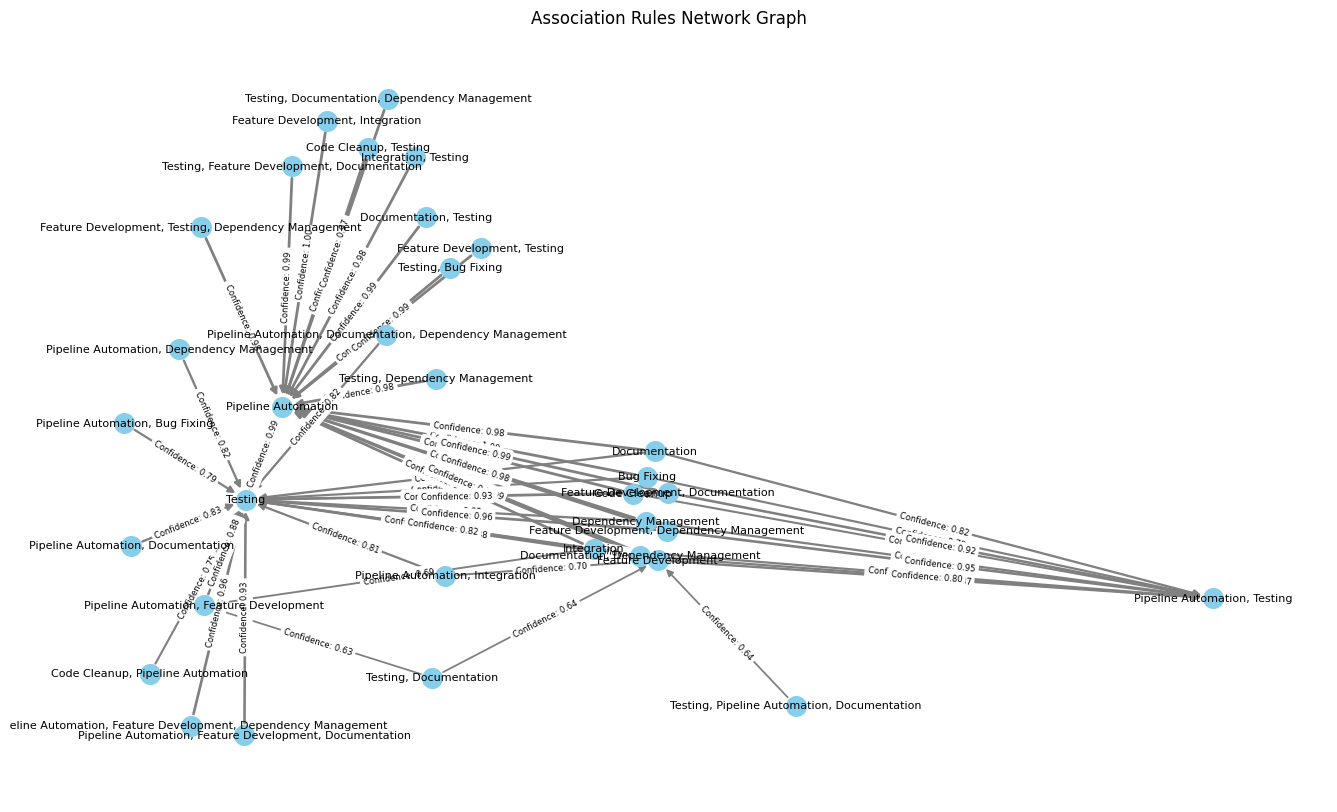

In [30]:
G = nx.DiGraph()
for index, rule in rules.iterrows():
    antecedent = ', '.join(rule['antecedents'])
    consequent = ', '.join(rule['consequents'])
    G.add_edge(antecedent, consequent, weight=rule['confidence'])

# Draw the directed graph with arrows
plt.figure(figsize=(17, 10))
pos = nx.spring_layout(G, seed=42)
labels = {edge: f"Confidence: {G.edges[edge]['weight']:.2f}" for edge in G.edges}
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=[d['weight'] * 2 for u, v, d in G.edges(data=True)], edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=6)
plt.axis('off')
plt.title('Association Rules Network Graph')
plt.savefig('rq2_arm.eps', format='eps')

plt.show()

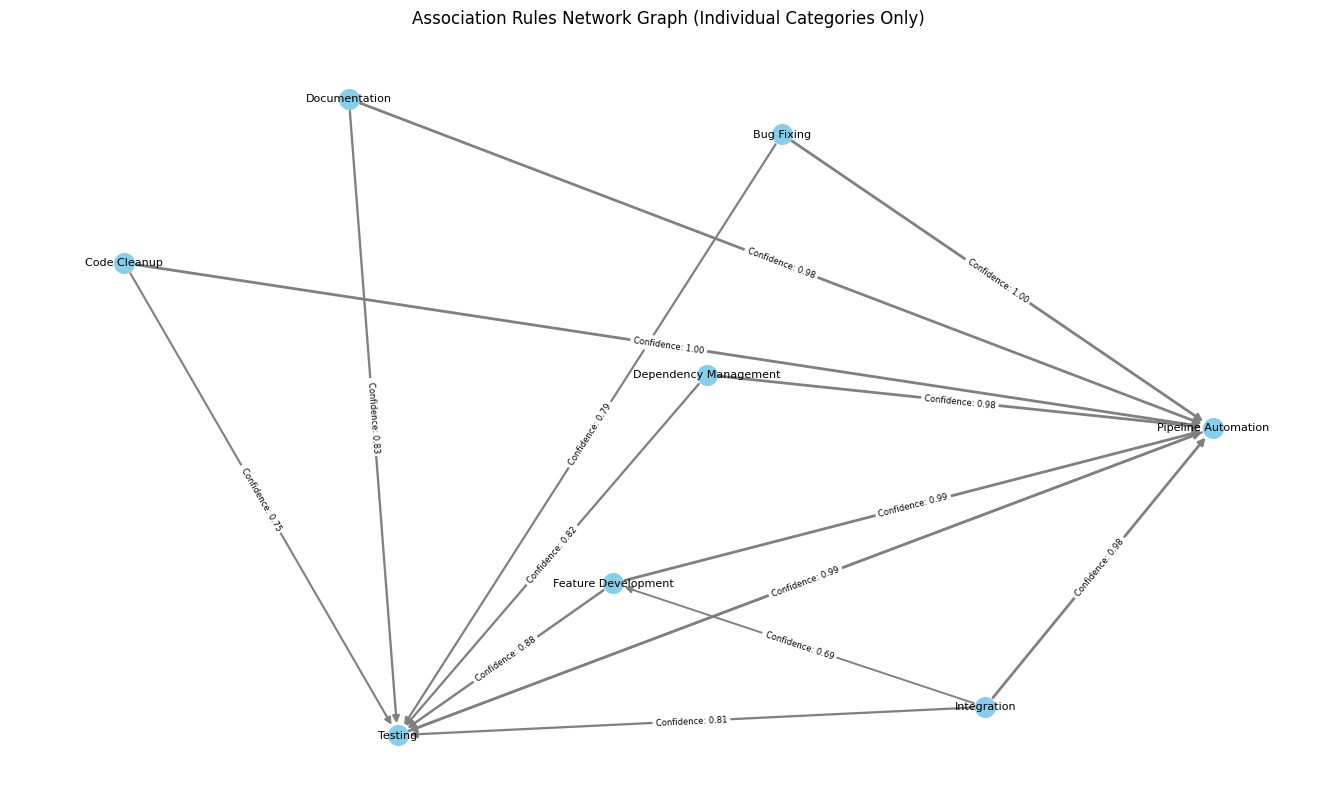

In [36]:
filtered_rules = rules[(rules['antecedents'].apply(lambda x: len(x) == 1)) & 
                       (rules['consequents'].apply(lambda x: len(x) == 1))]

G = nx.DiGraph()

for index, rule in filtered_rules.iterrows():
    antecedent = next(iter(rule['antecedents']))  # Extract single antecedent
    consequent = next(iter(rule['consequents']))  # Extract single consequent
    G.add_edge(antecedent, consequent, weight=rule['confidence'])

# Draw the directed graph with arrows
plt.figure(figsize=(17, 10))
pos = nx.spring_layout(G, seed=42)
labels = {edge: f"Confidence: {G.edges[edge]['weight']:.2f}" for edge in G.edges}
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=[d['weight'] * 2 for u, v, d in G.edges(data=True)], edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=6)

plt.axis('off')
plt.title('Association Rules Network Graph (Individual Categories Only)')
plt.savefig('rq2_arm_individual_categories.eps', format='eps')
plt.show()